In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 波士顿房产数据

In [3]:
boston = datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

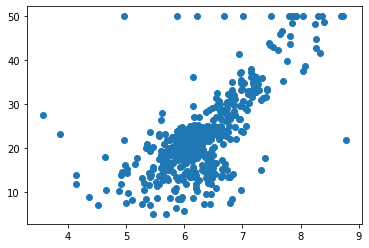

In [5]:
x = boston.data[:, 5]
y= boston.target

plt.scatter(x, y)
plt.show()

In [6]:
np.max(y)

50.0

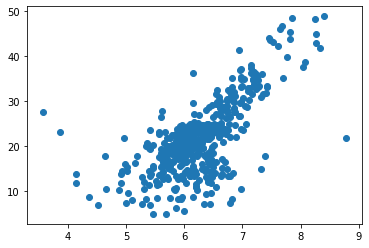

In [9]:
# 过滤数据
x = x[x < 50.0]
y = y[y < 50.0]
plt.scatter(x, y)
plt.show()

In [13]:
from playML.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)
# 训练数据
print(x_train.shape)
# 测试数据
print(x_test.shape)

(392,)
(98,)


In [14]:
from playML.SimpleLinearRegression import SimpleLinearRegression2
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

# 斜率
print(reg.a_)
# 截距
print(reg.b_)

7.8608543562689555
-27.459342806705543


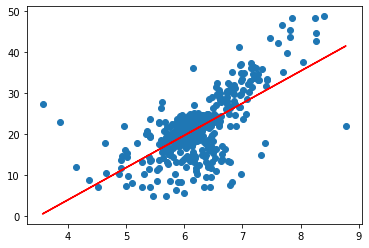

In [15]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [16]:
# 使用训练好的模型预测测试数据
y_predict = reg.predict(x_test)

### MSE

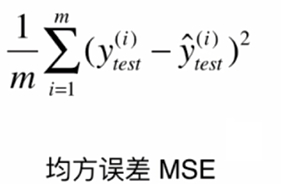

In [18]:
mse_test = np.sum((y_predict - y_test)**2)/len(y_test)
mse_test

24.156602134387438

### RMSE
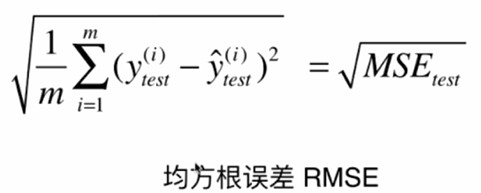

In [19]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE
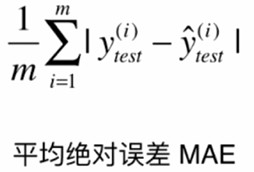

In [22]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

### scikit-learn中的mse、mae

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error(y_test, y_predict)

24.156602134387438

In [25]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873